#**Support Vector Machines to Identify Pulsar Stars**

**Dataset:** Each candidate is described by 8 continuous variables and a single class variable. The first four
are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of
continuous variables that describe a longitude-resolved version of the signal that has been
averaged in both time and frequency. The remaining four variables are similarly obtained from
the DM-SNR curve. The dataset is contained in pulsar_data_train.csv and pulsar_data_test.csv.

**Task:**  The key task is to Predict if a star is a pulsar star or not.


**Input Variables:**

* Mean of the integrated profile
* Standard deviation of the integrated profile 
* Excess kurtosis of the integrated profile
* Skewness of the integrated profile 
* Mean of the DM-SNR curve 
* Standard deviation of the DM-SNR curve 
* Excess kurtosis of the DM-SNR curve 
* Skewness of the DM-SNR curve

**Output Variable:**
* target_class (0,1)


In [100]:
#importing the basic required libraries
import numpy as np
import pandas as pd

##**Reading data from the given data format(csv file):**

In [101]:
from google.colab import files 
uploaded= files.upload() #uploading the files

Saving pulsar_data_test.csv to pulsar_data_test (1).csv
Saving pulsar_data_train.csv to pulsar_data_train (1).csv


In [102]:
import io
#creating dataframes from the csv file
df=pd.read_csv(io.BytesIO(uploaded['pulsar_data_train.csv'])) 

In [103]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [104]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [106]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


All the input variables are found to be of float type and are continuous. The variable 'taget_class' is found to be a binary categorical variable.

##**Cleaning and Preparing the Data:**

###**Checking for Missing values in the data:**

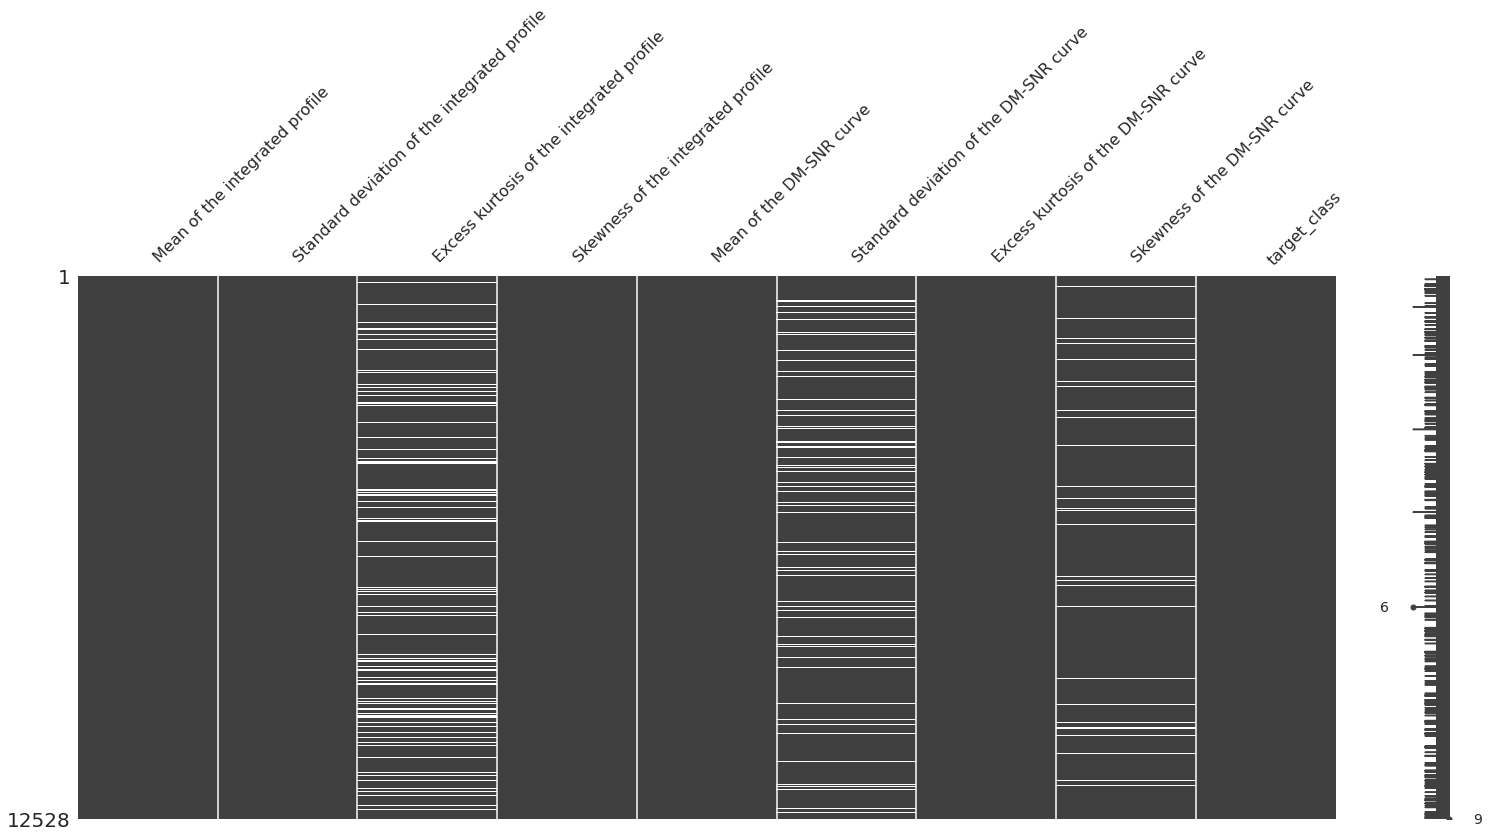

In [107]:
import missingno as msno 
msno.matrix(df) #visualizing the missing data/NaN values in the dataframe

**Inferance:**
* There are significant number of NaN/missing values in the data

###**Handling the missing values in the data:**

In [109]:
df=df.dropna()

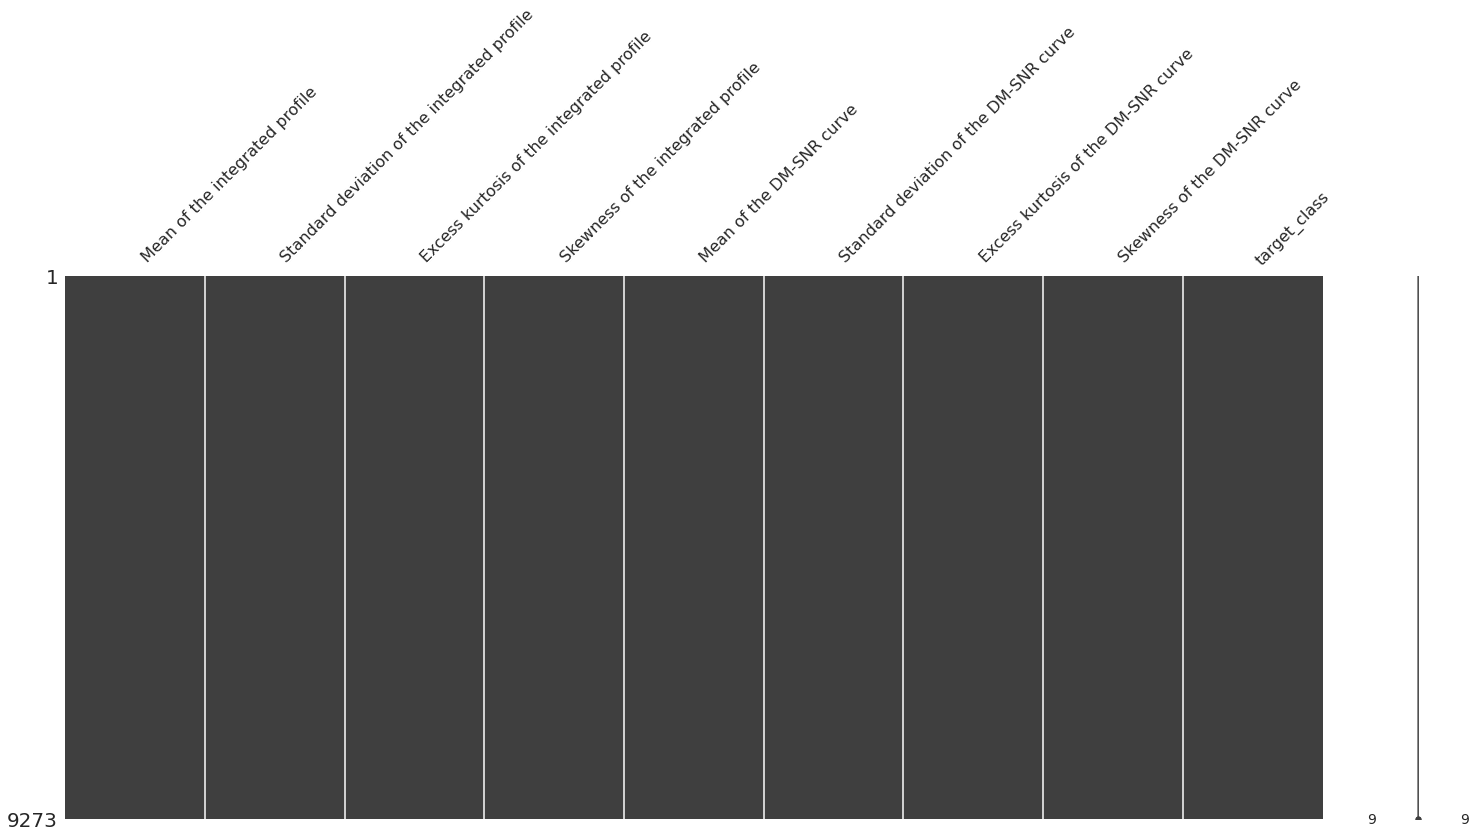

In [111]:
msno.matrix(df)

##**Exploratory Data Analysis and Visualization:**

In [115]:
#importing the libraries required for visualization
import os
import torch
import torchvision
from torch.utils.data import random_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Exploratory Data Analysis and Visualization:**

Text(0, 0.5, 'Candidate Count')

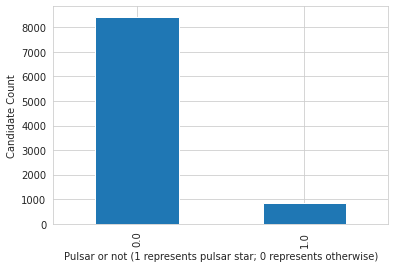

In [113]:
plt = df.target_class.value_counts().plot(kind='bar')
plt.set_xlabel('Pulsar or not (1 represents pulsar star; 0 represents otherwise)')
plt.set_ylabel('Candidate Count')

**Inferance:**
* A majority of candidates are not pulsar stars.
* The Data is imbalanced. 

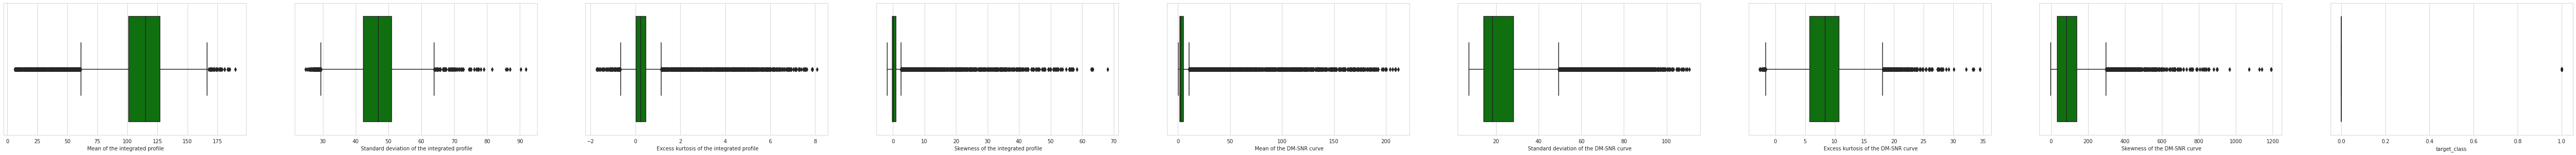

In [116]:
# Plotting a box plot to show the distribution of quantitative data in a way that facilitates comparisons between variables 
l=np.array(df.columns)

number_of_columns=10
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(100,50))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(x=df[l[i]],y=None,color='green')

The above box plot shows that the data contains a significant amount of outliers/ variables with a huge range of values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

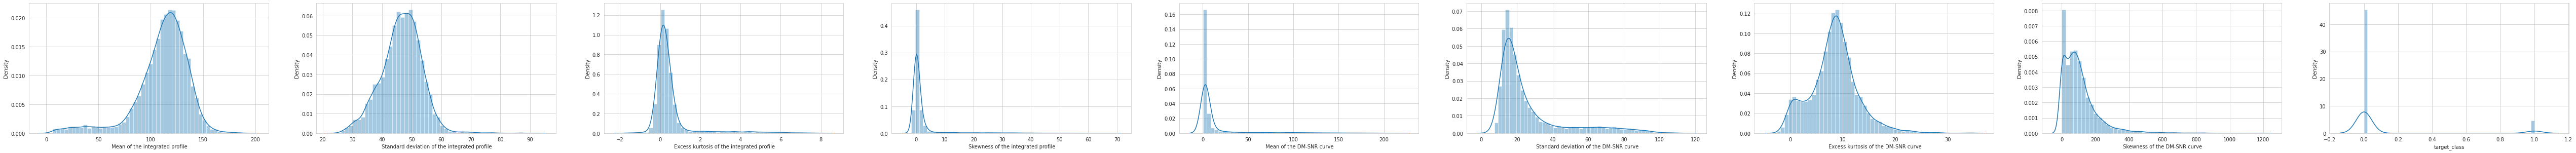

In [117]:
#Using Kernel density estimate (kde) for plotting the shape of distributions to check the linearity of variables and look for skewness of features
plt.figure(figsize=(100,50))
l=np.array(df.columns)
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


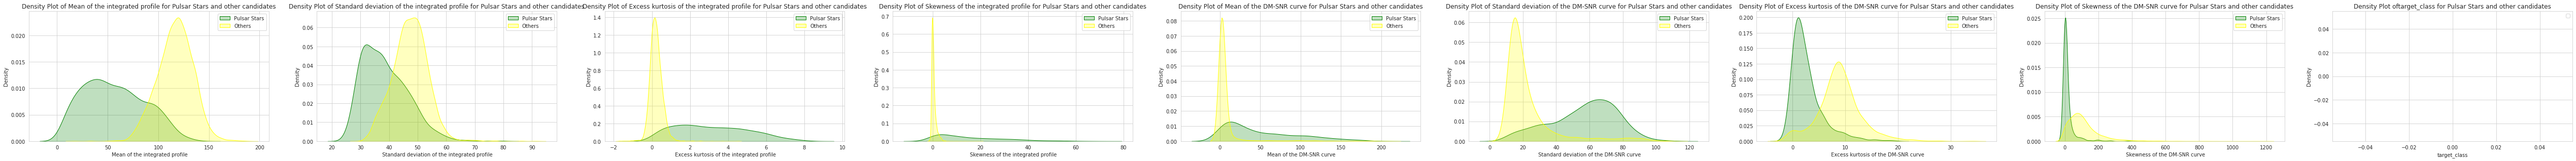

In [118]:
#Using Kernel density estimate (kde) for for Pulsar Stars and other candidates

plt.figure(figsize=(100,50))
l=np.array(df.columns)
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    ax= sns.kdeplot(df[df.columns[i]][df.target_class == 1], color="green", shade=True)
    sns.kdeplot(df[df.columns[i]][df.target_class == 0], color="yellow", shade=True)
    plt.legend(['Pulsar Stars', 'Others'])
    plt.title('Density Plot of'+ df.columns[i] + ' for Pulsar Stars and other candidates')
    ax.set(xlabel=df.columns[i])

**Inferances:**
* Pulsar Stars have a lower 'Mean of the integrated profile' when compared to othe candidates.
* Pulsar Stars have a lower 'Standard deviation of the integrated profile' when compared to other non-pulsar candidates.
* Pulsar Stars exhibit a very wide range of values for the variables, 'Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve'.
* Pulsar Stars have a higher 'Standard deviation of the DM-SNR curve' when compared to other non-pulsar candidates.
* Pulsar Stars have a lower 'Excess kurtosis of the DM-SNR curve' when compared to other candidates.
* Pulsar Stars have a lower 'Skewness of the DM-SNR curve' when compared to other non-pulsar candidates.

##**Support Vector Machines to Identify Pulsar Stars:**

###**Making the Training, Validation and Test Sets**
While building real-world machine learning models, it is quite common to split the dataset into three parts:

**Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.

**Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. Learn more here.


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
train_df, val_df = train_test_split(df, test_size=0.25, random_state=42)

In [121]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (6954, 9)
val_df.shape : (2319, 9)


###**Identifying Input and Target Columns**
Let's create a list of input columns, and also identify the target column.

In [122]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [123]:
input_cols = [' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']

In [124]:
target_col = 'target_class'

##**Feature Scaling:**

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()
scaler.fit(df[input_cols])

StandardScaler()

In [127]:
df[input_cols]=scaler.transform(df[input_cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [128]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [129]:
X_train=train_inputs
y_train=train_targets
X_val=val_inputs
y_val=val_targets

#**Modelling**

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

In [131]:
models = [LogisticRegression(),SVC(),LinearSVC(),DecisionTreeClassifier(),\
          RandomForestClassifier(n_estimators = 100),KNeighborsClassifier(10),\
         SGDClassifier(max_iter = 100, tol = None),Perceptron(max_iter = 100, tol = None),GaussianNB()]

In [132]:
models_list = ['Logistic Regression','Support Vector Machines','Linear Support Vector Machines',\
               'Decision Tree','Random Forest','k-Nearest Neighbours', 'Stochastic Gradient Descent',\
               'Perceptron','Naive Bayes']
accuracy_list = []

In [133]:
for i in models:
    i.fit(X_train,y_train)
    accuracy = round(100*i.score(X_val,y_val),2)
    print(str(i) + ' Accuracy {}%'.format(accuracy))
    accuracy_list.append(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression() Accuracy 97.8%
SVC() Accuracy 97.59%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC() Accuracy 89.65%
DecisionTreeClassifier() Accuracy 96.68%
RandomForestClassifier() Accuracy 97.8%
KNeighborsClassifier(n_neighbors=10) Accuracy 97.59%
SGDClassifier(max_iter=100, tol=None) Accuracy 97.63%
Perceptron(max_iter=100, tol=None) Accuracy 97.54%
GaussianNB() Accuracy 95.21%


In [134]:
models_dataframe = pd.DataFrame({'Models': models_list,'Accuracy':accuracy_list})
models_dataframe.set_index('Models', inplace = True)
models_dataframe.sort_values(by = ['Accuracy'], ascending=False)

,Accuracy
Models,
Logistic Regression,97.80
Random Forest,97.80
Stochastic Gradient Descent,97.63
Support Vector Machines,97.59
k-Nearest Neighbours,97.59
Perceptron,97.54
Decision Tree,96.68
Naive Bayes,95.21
Linear Support Vector Machines,89.65
